# Modeling Long-Term Stock Price Trends with Polynomial Regression

In this finance tutorial in Python:
* Learn how to fetch and clean historical stock data from yfinance.
* Learn to do financial trend analysis.
* Visualize stock data and plot regression lines that are easy to read and stylish.
* Apply linear regression to polynomials to improve model fit and predict long-term trends.
* Display model stats and interpret key statistics like R-squared to across multiple models to choose the optimal one.
* Learn to work with multiple packages in Python like pandas, numpy, statsmodels, plotly.
* Create a super cool tool that quickly analyzes a stock's long-term price trend.

#### For previous tutorials, please check:
* [How to Fetch Stock Data](https://github.com/yusifrefae/Jupyter-Projects/blob/main/fetch-stock-data.ipynb)
* [Stock Options Data Analysis](https://github.com/yusifrefae/Jupyter-Projects/blob/main/stock-options-data-analysis.ipynb)
* [Calculate Expected Move using Options](https://github.com/yusifrefae/Jupyter-Projects/blob/main/calculate-expected-move.ipynb)
* [Automating Two-Stage Dividend Growth Model](https://github.com/yusifrefae/Jupyter-Projects/blob/main/two-stage-growth-model.ipynb)
* [Predicting Stock Prices using Multiple Linear Regression](http://localhost:8977/notebooks/7-multiple-linear-regression-tutorial.ipynb)
* [Calculating Portfolio Risk and Return and Sharpe Ratio](https://github.com/yusifrefae/Jupyter-Projects/blob/main/portfolio-risk-and-return.ipynb)

## Begin by importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import plotly.graph_objects as go

## Define a function to fetch historical price data

In [2]:
def clean_stock_data(symbol):
    """Pull full historical stock data from yfinance, add trend column, drop extraneous data.
       Return dataframe to use in creating chart and polynomial regression model."""
    stock = yf.Ticker(symbol).history(period='max')  # Pull the data 
    stock_cleaned = stock.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)  # Drop extra columns
    stock_cleaned['Trend'] = range(1, len(stock)+1)  # Add trend column
    stock_cleaned = stock_cleaned[['Trend', 'Open', 'High', 'Low', 'Close']]  # Reorder columns
    return stock_cleaned  # Return dataframe

## Demo: Putting Apple's entire price history into a dataframe

In [3]:
df = clean_stock_data('AAPL')
df

Trend        Open        High         Low  \
Date                                                                   
1980-12-12 00:00:00-05:00      1    0.098485    0.098913    0.098485   
1980-12-15 00:00:00-05:00      2    0.093775    0.093775    0.093347   
1980-12-16 00:00:00-05:00      3    0.086924    0.086924    0.086495   
1980-12-17 00:00:00-05:00      4    0.088636    0.089064    0.088636   
1980-12-18 00:00:00-05:00      5    0.091206    0.091634    0.091206   
...                          ...         ...         ...         ...   
2025-10-22 00:00:00-04:00  11307  262.649994  262.850006  255.429993   
2025-10-23 00:00:00-04:00  11308  259.940002  260.619995  258.010010   
2025-10-24 00:00:00-04:00  11309  261.190002  264.130005  259.179993   
2025-10-27 00:00:00-04:00  11310  264.880005  269.119995  264.649994   
2025-10-28 00:00:00-04:00  11311  268.989990  269.890015  268.149994   

                                Close  
Date                                   
1980-12-12 00:00:00-05:00    0.098485  
1980-12-15 00:00:00-05:00    0.093347  
1980-12-16 00:00:00-05:00    0.086495  
1980-12-17 00:00:00-05:00    0.088636  
1980-12-18 00:00:00-05:00    0.091206  
...                               ...  
2025-10-22 00:00:00-04:00  258.450012  
2025-10-23 00:00:00-04:00  259.579987  
2025-10-24 00:00:00-04:00  262.820007  
2025-10-27 00:00:00-04:00  268.809998  
2025-10-28 00:00:00-04:00  269.000000  

[11311 rows x 5 columns]

# Step by Step Breakdown: Fetching and Cleaning Stock Data

### Fetch the data from yfinance

In [4]:
stock = yf.Ticker('AAPL').history(period='max') 
stock.sample(3)

Open       High        Low      Close  \
Date                                                                    
2017-08-11 00:00:00-04:00  36.578503  37.038654  36.454706  36.784050   
2019-11-15 00:00:00-05:00  63.682234  64.189413  63.520424  64.184586   
2018-09-28 00:00:00-04:00  53.300167  53.549134  53.117594  53.525425   

                              Volume  Dividends  Stock Splits  
Date                                                           
2017-08-11 00:00:00-04:00  105028400        0.0           0.0  
2019-11-15 00:00:00-05:00  100206400        0.0           0.0  
2018-09-28 00:00:00-04:00   91717600        0.0           0.0

### Drop extraneous columns

In [5]:
stock_cleaned = stock.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)  # Drop extra columns
stock_cleaned.head(3)

Open      High       Low     Close
Date                                                             
1980-12-12 00:00:00-05:00  0.098485  0.098913  0.098485  0.098485
1980-12-15 00:00:00-05:00  0.093775  0.093775  0.093347  0.093347
1980-12-16 00:00:00-05:00  0.086924  0.086924  0.086495  0.086495

### Add a trend column

In [6]:
stock_cleaned['Trend'] = range(1, len(stock)+1)  
stock_cleaned.head(3)

Open      High       Low     Close  Trend
Date                                                                    
1980-12-12 00:00:00-05:00  0.098485  0.098913  0.098485  0.098485      1
1980-12-15 00:00:00-05:00  0.093775  0.093775  0.093347  0.093347      2
1980-12-16 00:00:00-05:00  0.086924  0.086924  0.086495  0.086495      3

### Reorder columns

In [7]:
stock_cleaned = stock_cleaned[['Trend', 'Open', 'High', 'Low', 'Close']]
stock_cleaned.head(3)

Trend      Open      High       Low     Close
Date                                                                    
1980-12-12 00:00:00-05:00      1  0.098485  0.098913  0.098485  0.098485
1980-12-15 00:00:00-05:00      2  0.093775  0.093775  0.093347  0.093347
1980-12-16 00:00:00-05:00      3  0.086924  0.086924  0.086495  0.086495

## Define a function to fit a **polynomial** regression model around the data

In [8]:
def fit_regression_model(symbol, order):
    """Pulls cleaned up dataframe of stock's entire historical data, then runs polynomial regression model."""
    df = clean_stock_data(symbol)  # Pull cleaned dataframe
    trend = np.arange(len(df))  # Time index
    ln_y = np.log(df["Close"])  # Log of close price

    # Build polynomial matrix. e.g.: t, t^2, t^3...
    poly_X = np.column_stack([trend**i for i in range(1, order + 1)]) 

    # Add constant column to matrix (intercept)
    poly_X = sm.add_constant(poly_X) 

    # Fit polynomial model
    model = sm.OLS(ln_y, poly_X).fit()  

    # Store some model building blocks for later, when we graph the figure
    model.trend = np.arange(len(df))
    model.poly_X = poly_X
    
    return model

## Demo: create an order 1 (log-lin) regression model
* Note: a log-lin model is simply a polynomial model with an order of 1.

In [9]:
myModel = fit_regression_model('AAPL', 1) 

print(f'Object Type: {type(myModel)}')
print(f'R-Squared: {myModel.rsquared: .4f}')

Object Type: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
R-Squared:  0.9001


## Demo: create an order 4 (polynomial) regression model

In [10]:
myModel = fit_regression_model('AAPL', 4) 

print(f'Object Type: {type(myModel)}')
print(f'R-Squared: {myModel.rsquared: .4f}')

Object Type: <class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
R-Squared:  0.9153


#### Notice how the R-squared **improved** with a 4th order regression? We'll analyze choosing the order in detail in a moment.

# Step by Step Breakdown: Building a Polynomial/Log-Lin Model

### Fetch cleaned dataframe

In [11]:
df = clean_stock_data('AAPL')
df.head(3)

Trend      Open      High       Low     Close
Date                                                                    
1980-12-12 00:00:00-05:00      1  0.098485  0.098913  0.098485  0.098485
1980-12-15 00:00:00-05:00      2  0.093775  0.093775  0.093347  0.093347
1980-12-16 00:00:00-05:00      3  0.086924  0.086924  0.086495  0.086495

### Put trend into NumPy array

In [12]:
trend = np.arange(len(df))
trend

array([    0,     1,     2, ..., 11308, 11309, 11310], shape=(11311,))

### Transform stock's close price: use NumPy to take the Natural Logarithm (LN) of close price

In [13]:
ln_y = np.log(df["Close"])
ln_y

Date
1980-12-12 00:00:00-05:00   -2.317852
1980-12-15 00:00:00-05:00   -2.371433
1980-12-16 00:00:00-05:00   -2.447664
1980-12-17 00:00:00-05:00   -2.423215
1980-12-18 00:00:00-05:00   -2.394634
                               ...   
2025-10-22 00:00:00-04:00    5.554702
2025-10-23 00:00:00-04:00    5.559065
2025-10-24 00:00:00-04:00    5.571469
2025-10-27 00:00:00-04:00    5.594005
2025-10-28 00:00:00-04:00    5.594711
Name: Close, Length: 11311, dtype: float64

# Polynomial Regression (Log-Transformed)
## $$ln(y_t) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_n x^n + \varepsilon_t$$

# Log-Linear Model (Single-Order Polynomial Regression)
## $$ln(y_t) = \beta_0 + \beta_1 x + \varepsilon_t$$

* Note: for a more comprehensive explanation of regression analysis, see: [Predicting Stock Prices using Multiple Linear Regression](http://localhost:8977/notebooks/7-multiple-linear-regression-tutorial.ipynb)
* In that tutorial we explored **linear** regression (multiple independent x variables).
* The difference here is that we include terms like $x^2$, $x^3$, etc in the predictive formula as well.
* $\varepsilon_t$ represents the error term at time t (trend). This captures the random variation in $y_t$ that the regression model doesn't explain.
* The $\beta$ coefficients quantify how each term ($x, x^2, x^3$, etc) explain changes in $\ln(y_t)$.

### Build a NumPy array with the polynomial features stacked. 
#### Let's choose an order 4 polynomial. For example:

| $x^0$ | $x^1$ | $x^2$ | $x^3$ |
|:-----:|:-----:|:-----:|:-----:|
| $0^0$ | $0^1$ | $0^2$ | $0^3$ |
| $1^0$ | $1^1$ | $1^2$ | $1^3$ |
| $2^0$ | $2^1$ | $2^2$ | $2^3$ | 
| $3^0$ | $3^1$ | $3^2$ | $3^3$ |
| ...| ... | .... | ... |


In [14]:
order = 4
poly_X = np.column_stack([trend**i for i in range(1, order + 1)])  # t, t^2, ...

poly_X[0:10] # Slice the array to show only the first ten elements

array([[   0,    0,    0,    0],
       [   1,    1,    1,    1],
       [   2,    4,    8,   16],
       [   3,    9,   27,   81],
       [   4,   16,   64,  256],
       [   5,   25,  125,  625],
       [   6,   36,  216, 1296],
       [   7,   49,  343, 2401],
       [   8,   64,  512, 4096],
       [   9,   81,  729, 6561]])

### Now add a fifth column of constants to the array, as a placeholder for the intercept:
* Note: the 1's are placeholders for the constant term (the intercept). They’re not data from the series.
* We need a fixed column so the model can estimate an intercept in addition to the other coefficients for $x^0$, $x^1$, $x^2$, $x^3$
* Otherwise the model would be forced to go through the origin. 


| $k$ | $x^0$ | $x^1$ | $x^2$ | $x^3$ |
|:-----:|:-----:|:-----:|:-----:|:-----:|
| 1 | $0^0$ | $0^1$ | $0^2$ | $0^3$ |
| 1 | $1^0$ | $1^1$ | $1^2$ | $1^3$ |
| 1 | $2^0$ | $2^1$ | $2^2$ | $2^3$ | 
| 1 | $3^0$ | $3^1$ | $3^2$ | $3^3$ |
| 1 | ...| ... | .... | ... |

In [15]:
poly_X = sm.add_constant(poly_X)

np.set_printoptions(suppress=True, precision=3)  # Makes the numbers diplay legibly. Don't worry about this.
poly_X[0:10]

array([[   1.,    0.,    0.,    0.,    0.],
       [   1.,    1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.,   16.],
       [   1.,    3.,    9.,   27.,   81.],
       [   1.,    4.,   16.,   64.,  256.],
       [   1.,    5.,   25.,  125.,  625.],
       [   1.,    6.,   36.,  216., 1296.],
       [   1.,    7.,   49.,  343., 2401.],
       [   1.,    8.,   64.,  512., 4096.],
       [   1.,    9.,   81.,  729., 6561.]])

## Let's fit a polynomial model around the inputs we just created, then print summary statistics.
#### Don't worry about most of the output. For this tutorial let's focus on selecting the R-squared closest to 1.

In [16]:
model = sm.OLS(ln_y, poly_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 4.072e+04
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:15:42   Log-Likelihood:                -12854.
No. Observations:               11311   AIC:                         2.572e+04
Df Residuals:                   11307   BIC:                         2.575e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.845e-06   2.31e-08    -79.994      0.000   -1.89e-06    -1.8e-06
x1            -0.0017   2.17e-05    -79.994      0.000      -0.002      -0.002
x2           4.49e-07   1.04e-08     43.119      0.000    4.29e-07    4.69e-07
x3         -2.968e-11   1.56e-12    -19.075      0.000   -3.27e-11   -2.66e-11
x4           6.62e-16   7.28e-17      9.093      0.000    5.19e-16    8.05e-16
==============================================================================
Omnibus:                     1782.064   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2873.532
Skew:                          -1.079   Prob(JB):                         0.00
Kurtosis:                       4.200   Cond. No.                     2.72e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Let's visualize what this model's actually doing...
* #### Finding a best-fit curve that minimizes the discrepancy (error) between the predicted values and the actual data points.

In [17]:
def graph_model(symbol, order, print_stats):
    """Pulls stock's cleaned up dataframe. Fits a polynomial regression on LN(price) and plots actual vs. 
       predicted stock prices. If 'print_stats' is True, prints the model equation and regression summary."""
    symbol = symbol.upper()  # Force symbol to upper case
    data = clean_stock_data(symbol)  # Fetch clean dataframe
    model = fit_regression_model(symbol, order)  # Fit model based on dataframe

    # Predict y values (close price) based on the model
    y_pred = np.exp(model.predict(model.poly_X))

    # Create the chart visuals
    fig = go.Figure()

    # Add data to the figure
    fig.add_scatter(x=data.index, y=data["Close"], mode="lines", name="Actual", line=dict(color="royalblue"))
    fig.add_scatter(x=data.index, y=y_pred, mode="lines", name="Trend", line=dict(color="crimson", dash="dash"))

    # Adjust figure appearance, title, axis labels
    fig.update_layout(
        title=f"{symbol} Close Price: Polynomial Model, Order {order}",
        xaxis_title="Date", yaxis_title="Price", template="plotly_dark", paper_bgcolor="black", plot_bgcolor="black",
        hovermode="x unified", width=900, height=500)

    # Add R-squared annotation to the figure
    fig.add_annotation(xref="paper", yref="paper", x=0.02, y=0.95, 
                       text=f"R² = {model.rsquared:.4f}", 
                       showarrow=False, font=dict(size=14, color="red"))
    fig.show()

    # Only print model formula and stats if boolean parameter is true
    if print_stats:
        
        # Dynamically expand model formula based on number of terms
        terms = [f"{c:.8f}" if i == 0 else f"({c:.8f} * x^{i})"
         for i, c in enumerate(model.params)]

        eq = " + ".join(terms)
        
        print("Predicted log(Price) ≈", eq)
        print()
        print(model.summary())  # Print model statistics

### Now the fun part: let's visualize each regression model, from order 1 to order 4

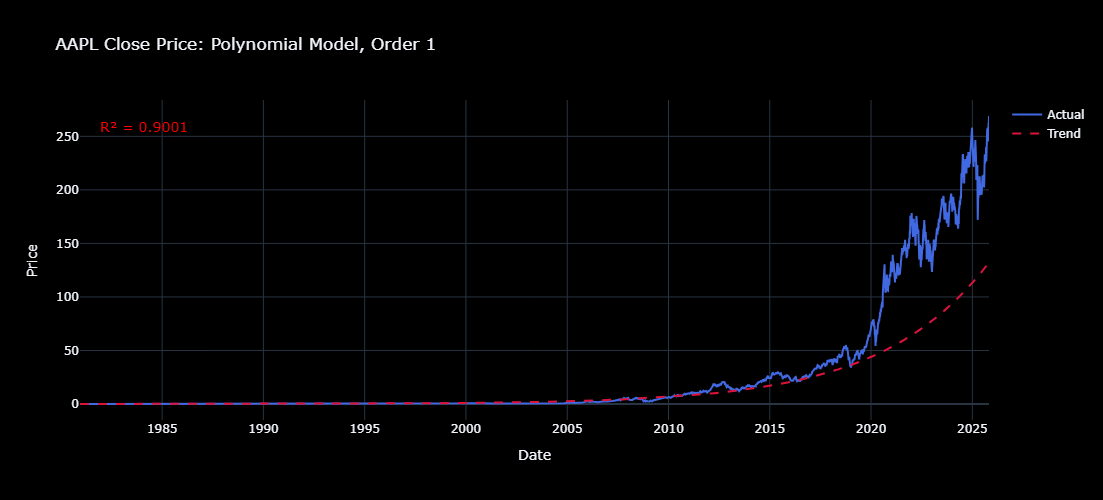

In [18]:
symbol = 'AAPL'
graph_model(symbol, 1, False)

### Notice how the model isn't a great fit for orders 1.
* The R-squared is 90%, but using an order 2 or 3  model offers a different perspectives.
* AAPL is overvalued based on an order 1 regression and undervalued based on order 2 and 3 regressions.

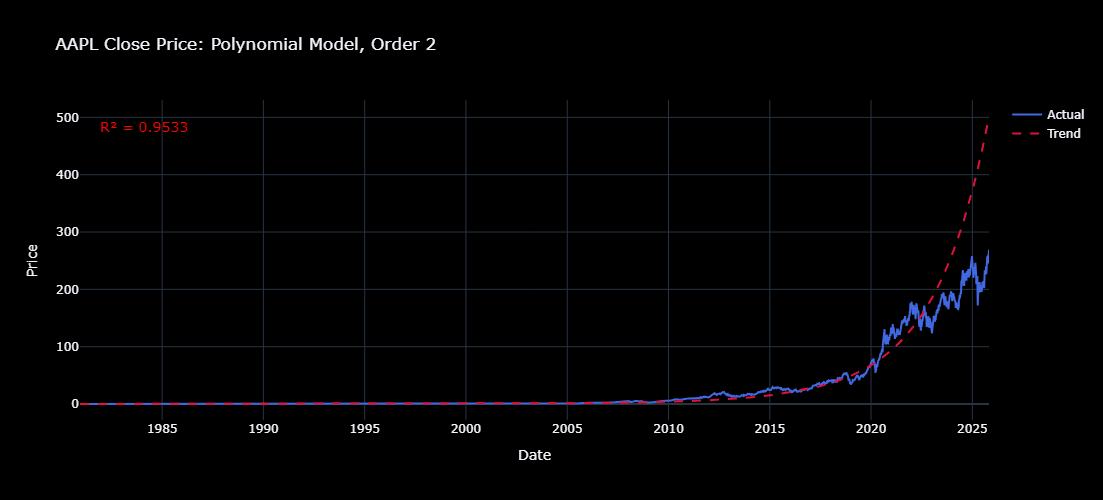

In [19]:
graph_model(symbol, 2, False)

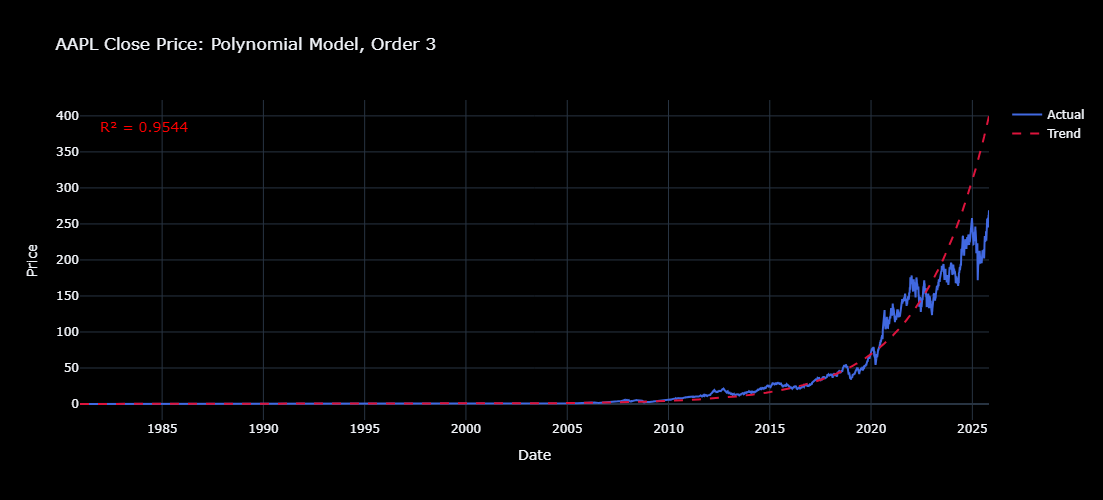

In [20]:
graph_model(symbol, 3, False)

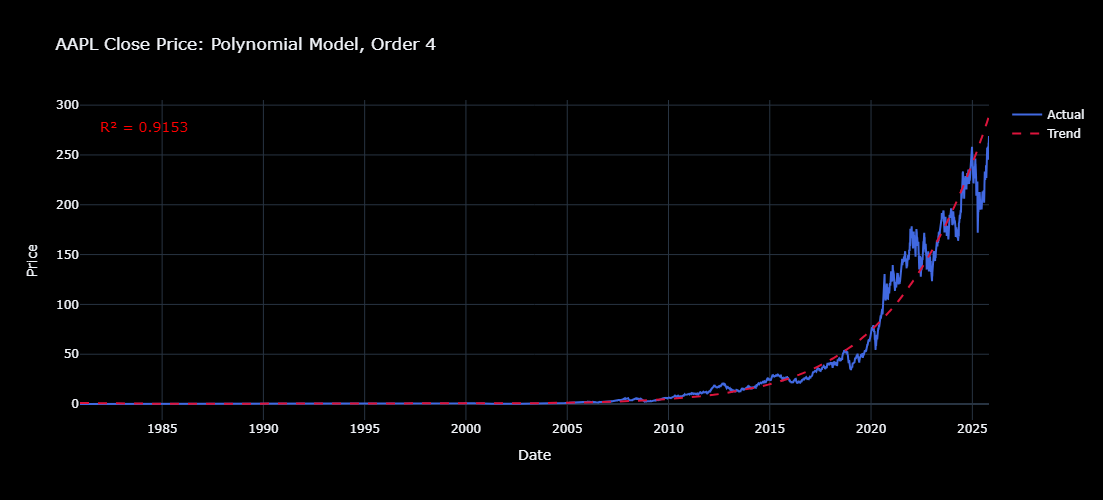

In [21]:
graph_model(symbol, 4, False)

### Order 4 has a lower R-squared than orders 2 and 3
* Our model is beginning to overfit our data and tune into too much 'noise' in the model.

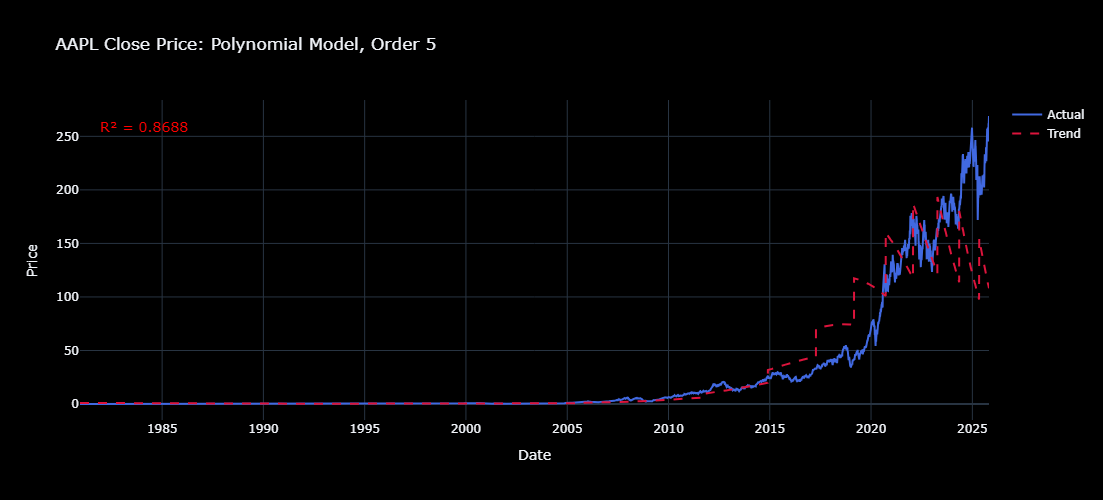

In [22]:
graph_model(symbol, 5, False)

## Order 5 is awful. We should stop here. 
* The R-squared dropped significantly and there is obvious overfitting.

# Interpreting Results
* We can **not** infer short or medium-term trends from these results.
* We can only infer long-term (greater than 1 year) trends from this type of analysis.
* Apple stock seems to be **undervalued** from a long-term perspective. In other words, it has room to grow.
* We can use this method to quickly visualize long-term trends and derive a predictive equation, as shown below.
* Note: for more info about short and medium-term price predictions, see:
    * [Calculate Expected Move using Options](https://github.com/yusifrefae/Jupyter-Projects/blob/main/calculate-expected-move.ipynb)
    * [Predicting Stock Prices using Multiple Linear Regression](http://localhost:8977/notebooks/7-multiple-linear-regression-tutorial.ipynb)

### Let's look at the predictive equation for an order 3 regression. 
* We do this by changing the parameter from False to True

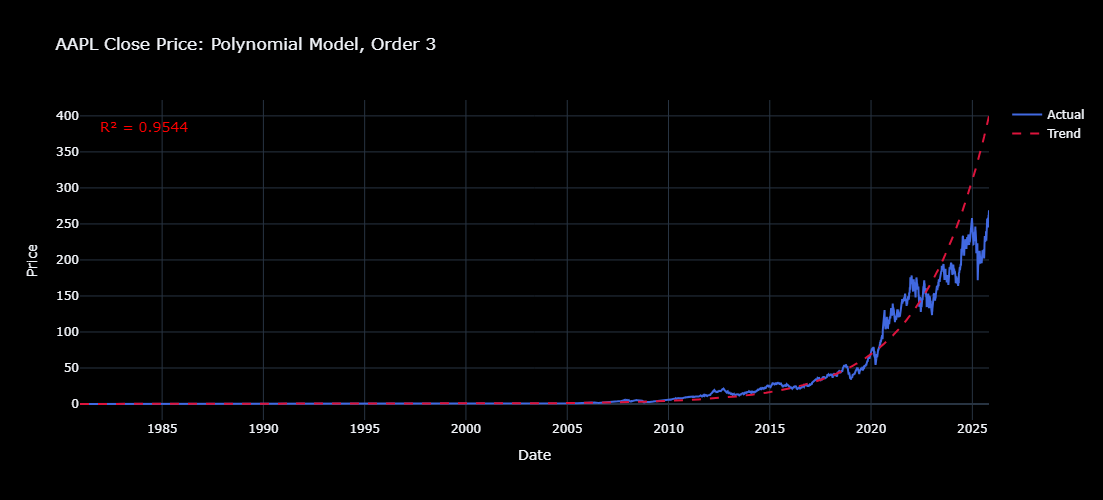

Predicted log(Price) ≈ -2.06416981 + (-0.00019778 * x^1) + (0.00000012 * x^2) + (-0.00000000 * x^3)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 7.885e+04
Date:                Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:15:50   Log-Likelihood:                -9353.8
No. Observations:               11311   AIC:                         1.872e+04
Df Residuals:                   11307   BIC:                         1.874e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [23]:
graph_model(symbol, 3, True)

### So now we have the intercept and coefficients.
* Predicted log(Price) ≈ -2.06416981 + (-0.00019778 * x^1) + (0.00000012 * x^2) + (-0.00000000 * x^3)
* Notice the coefficient on x^3 is incredibly small (shows as 0 due to rounding) so we may want to use an order 2 regression for AAPL.

# Let's examine GLD (an ETF that tracks the price of gold) for orders 1 to 4

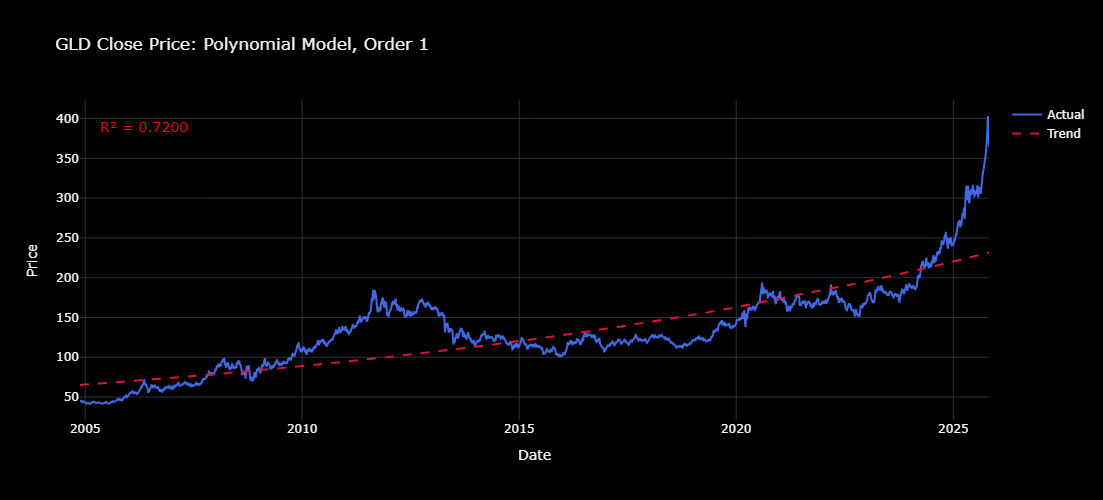

In [24]:
symbol = 'GLD'
graph_model(symbol, 1, False)

### Order 1 is a very poor fit. R-squared is 72%. This is an ideal case for a polynomial regression fit.

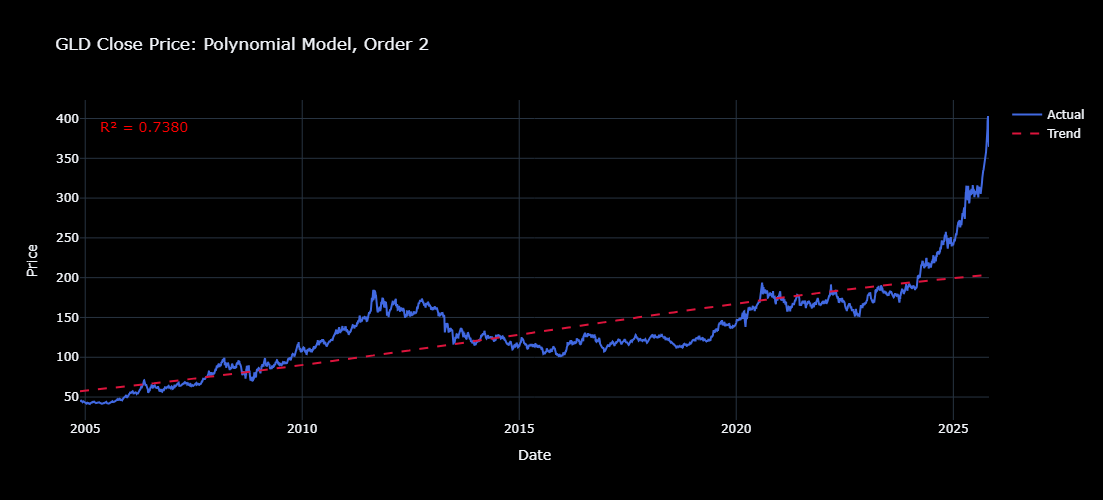

In [25]:
graph_model(symbol, 2, False)

### Order 2 performs almost as poorly as order 1.

In [26]:
graph_model(symbol, 3, False)

### Order 3 is a great fit! 92% R-squared and it really looks similar to our data.
* Based on this model, gold appears to be overvalued, which makes sense given the historic surge gold experienced in late 2025.

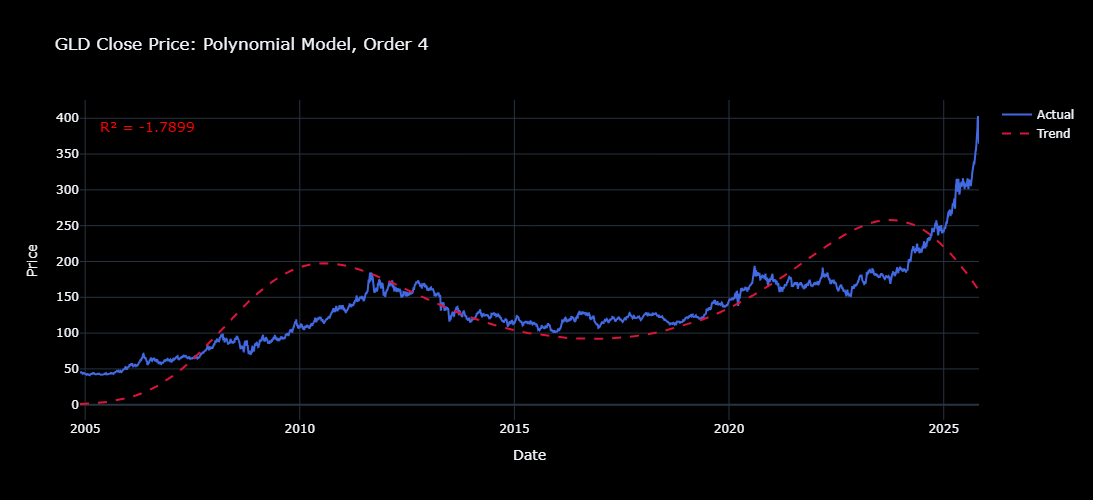

In [27]:
graph_model(symbol, 4, False)

### Order 4 Begins to overfit. R-squared is NEGATIVE, which makes this model useless.

## Author: Yusif Refae, MBA
#### Let's work together: <a href = "https://www.linkedin.com/in/yusifrefae/">Message me on LinkedIn!</a>

# Full Code For Reference

In [28]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import plotly.graph_objects as go
####################################################################################################################################

def clean_stock_data(symbol):
    """Pull full historical stock data from yfinance, add trend column, drop extraneous data.
       Return dataframe to use in creating chart and polynomial regression model."""
    stock = yf.Ticker(symbol).history(period='max')  # Pull the data 
    stock_cleaned = stock.drop(['Volume', 'Dividends', 'Stock Splits'], axis=1)  # Drop extra columns
    stock_cleaned['Trend'] = range(1, len(stock)+1)  # Add trend column
    stock_cleaned = stock_cleaned[['Trend', 'Open', 'High', 'Low', 'Close']]  # Reorder columns
    return stock_cleaned  # Return dataframe
####################################################################################################################################

def fit_regression_model(symbol, order):
    """Pulls cleaned up dataframe of stock's entire historical data, then runs polynomial regression model."""
    df = clean_stock_data(symbol)  # Pull cleaned dataframe
    trend = np.arange(len(df))  
    ln_y = np.log(df["Close"])  # Log of close price

    # Build polynomial matrix. e.g.: t, t^2, t^3...
    poly_X = np.column_stack([trend**i for i in range(1, order + 1)]) 

    # Add constant column to matrix (intercept)
    poly_X = sm.add_constant(poly_X) 

    # Fit polynomial model
    model = sm.OLS(ln_y, poly_X).fit()  
        
    return model
####################################################################################################################################

def graph_model(symbol, order, print_stats):
    """Pulls stock's cleaned up dataframe. Fits a polynomial regression on LN(price) and plots actual vs. 
       predicted stock prices. If 'print_stats' is True, prints the model equation and regression summary."""
    symbol = symbol.upper()  # Force symbol to upper case
    data = clean_stock_data(symbol)  # Fetch clean dataframe
    model = fit_regression_model(symbol, order)  # Fit model based on dataframe

    # Predict y values (close price) based on the model
    y_pred = np.exp(model.predict(model.poly_X))

    # Create the chart visuals
    fig = go.Figure()

    # Add data to the figure
    fig.add_scatter(x=data.index, y=data["Close"], mode="lines", name="Actual", line=dict(color="royalblue"))
    fig.add_scatter(x=data.index, y=y_pred, mode="lines", name="Trend", line=dict(color="crimson", dash="dash"))

    # Adjust figure appearance, title, axis labels
    fig.update_layout(
        title=f"{symbol} Close Price: Polynomial Model, Order {order}",
        xaxis_title="Date", yaxis_title="Price", template="plotly_dark", paper_bgcolor="black", plot_bgcolor="black",
        hovermode="x unified", width=900, height=500)

    # Add R-squared annotation to the figure
    fig.add_annotation(xref="paper", yref="paper", x=0.02, y=0.95, 
                       text=f"R² = {model.rsquared:.4f}", 
                       showarrow=False, font=dict(size=14, color="red"))
    fig.show()

    # Only print model formula and stats if boolean parameter is true
    if print_stats:
        
        # Dynamically expand model formula based on number of terms
        terms = [f"{c:.8f}" if i == 0 else f"({c:.8f} * x^{i})"
         for i, c in enumerate(model.params)]

        eq = " + ".join(terms)
        
        print("Predicted log(Price) ≈", eq)
        print()
        print(model.summary())  # Print model statistics